# 2.0 Feature analysis

Here we analyze our images based on the 2 features we extracted: `black pixel count` and `number of regions`. 

### 1. Adding libraries we need

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

### 2. Read in the feature dataset from the result of 1.0 notebook

In [2]:
directory = "../dataset-numpy/"

dataset = pd.read_csv(os.path.join(directory, '1.0 - features.csv'), delimiter=',', header=0)

### 3. Group up the images by label with a dictionary

With this step we can create separate pandas dataframes for each label. This will make it easier to do the imputation. We want to handle images by category, since for each category, the features have different bounds.

We then describe each group of images.

In [3]:
unique_labels = dataset['label'].unique()

images_dict = {elem : pd.DataFrame() for elem in unique_labels }

for key in images_dict.keys():
    images_dict[key] = dataset[:][dataset.label == key]

for label, image_set in images_dict.items():
    print(f'=====[Label: {label}]=====')
    print(f'num of images: {len(image_set)}')
    print(f'missing features:\n{image_set.isnull().sum()}')
    print(image_set.describe())
    print()

=====[Label: joy]=====
num of images: 114
missing features:
label           0
black_pixels    0
regions         0
dtype: int64
       black_pixels     regions
count    114.000000  114.000000
mean    2409.017544    2.043860
std     1392.632631    0.336309
min      863.000000    0.000000
25%     2074.000000    2.000000
50%     2280.000000    2.000000
75%     2526.750000    2.000000
max    16384.000000    3.000000

=====[Label: ash]=====
num of images: 164
missing features:
label           0
black_pixels    0
regions         0
dtype: int64
       black_pixels     regions
count    164.000000  164.000000
mean    2458.701220    1.036585
std     1640.305842    0.244955
min     1111.000000    0.000000
25%     1989.250000    1.000000
50%     2252.500000    1.000000
75%     2533.000000    1.000000
max    16384.000000    2.000000

=====[Label: spear]=====
num of images: 131
missing features:
label           0
black_pixels    0
regions         0
dtype: int64
       black_pixels     regions
count  

We can see from the observations above that there are no missing values.

### 4. Check corelation between features

We print the Pearson correlation matrix to see if there is any correlation between the features. We can see that there is a strong negative correlation between the two features.

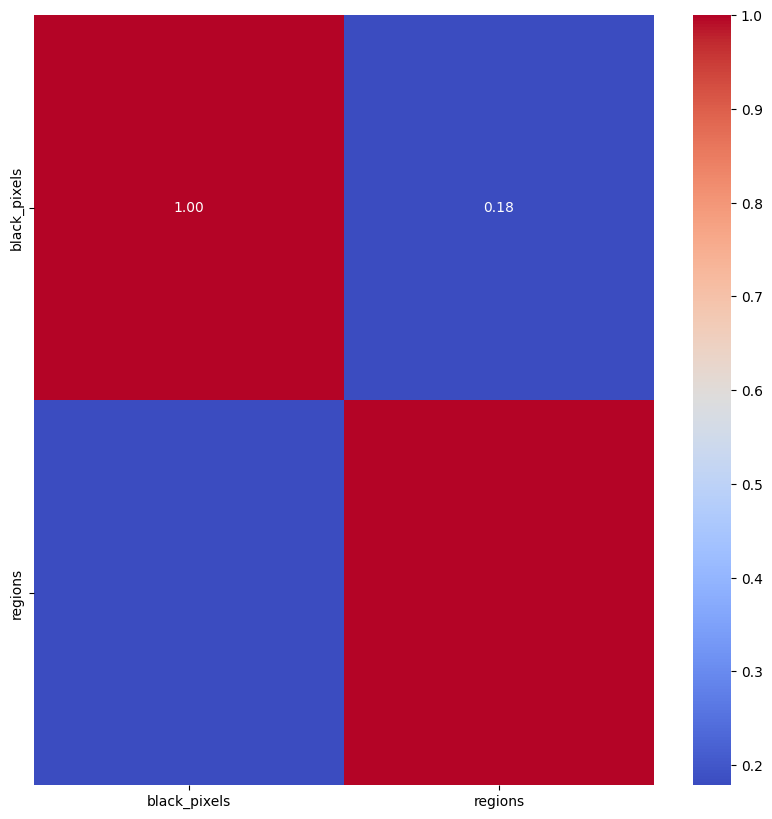

In [4]:
labels = [col for col in dataset.columns if col != 'label']

corr = dataset[labels].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### 5. Describe the data in graphs for each label

We create a boxplot for the number of black pixels and a histogram for the number of regions. With the boxplot, we can easily see outliers for the sum of black pizels. We used histograms for the regions as we know, that there mustn't be too many regions, and the outlier count shouldn't be to big.

Lastly, we create a pairplot to see corelation between our two features.

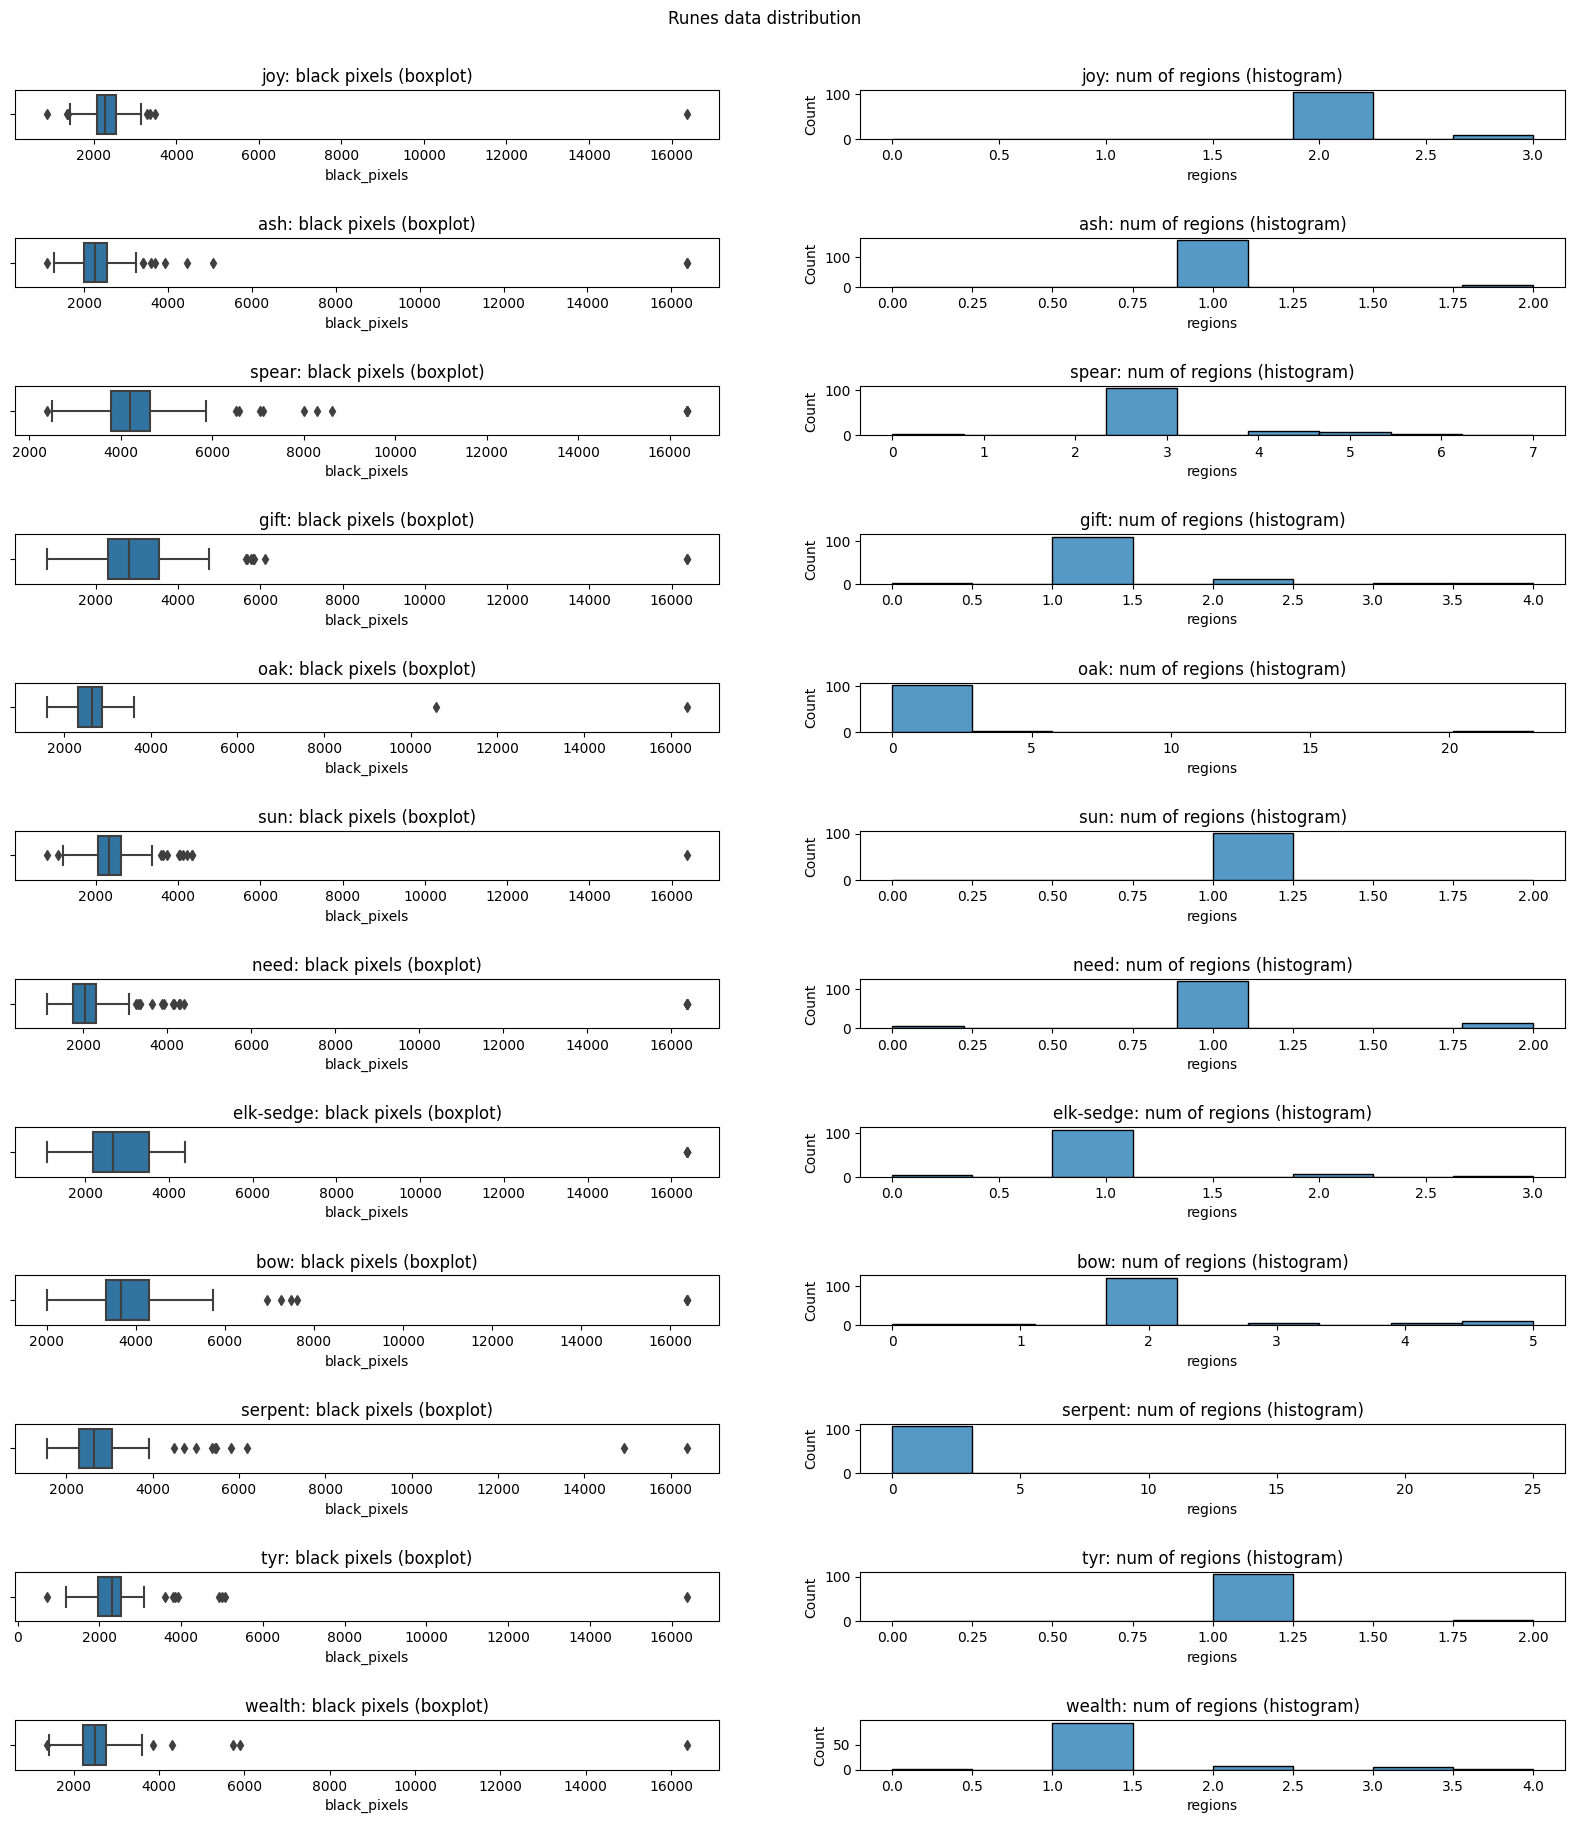

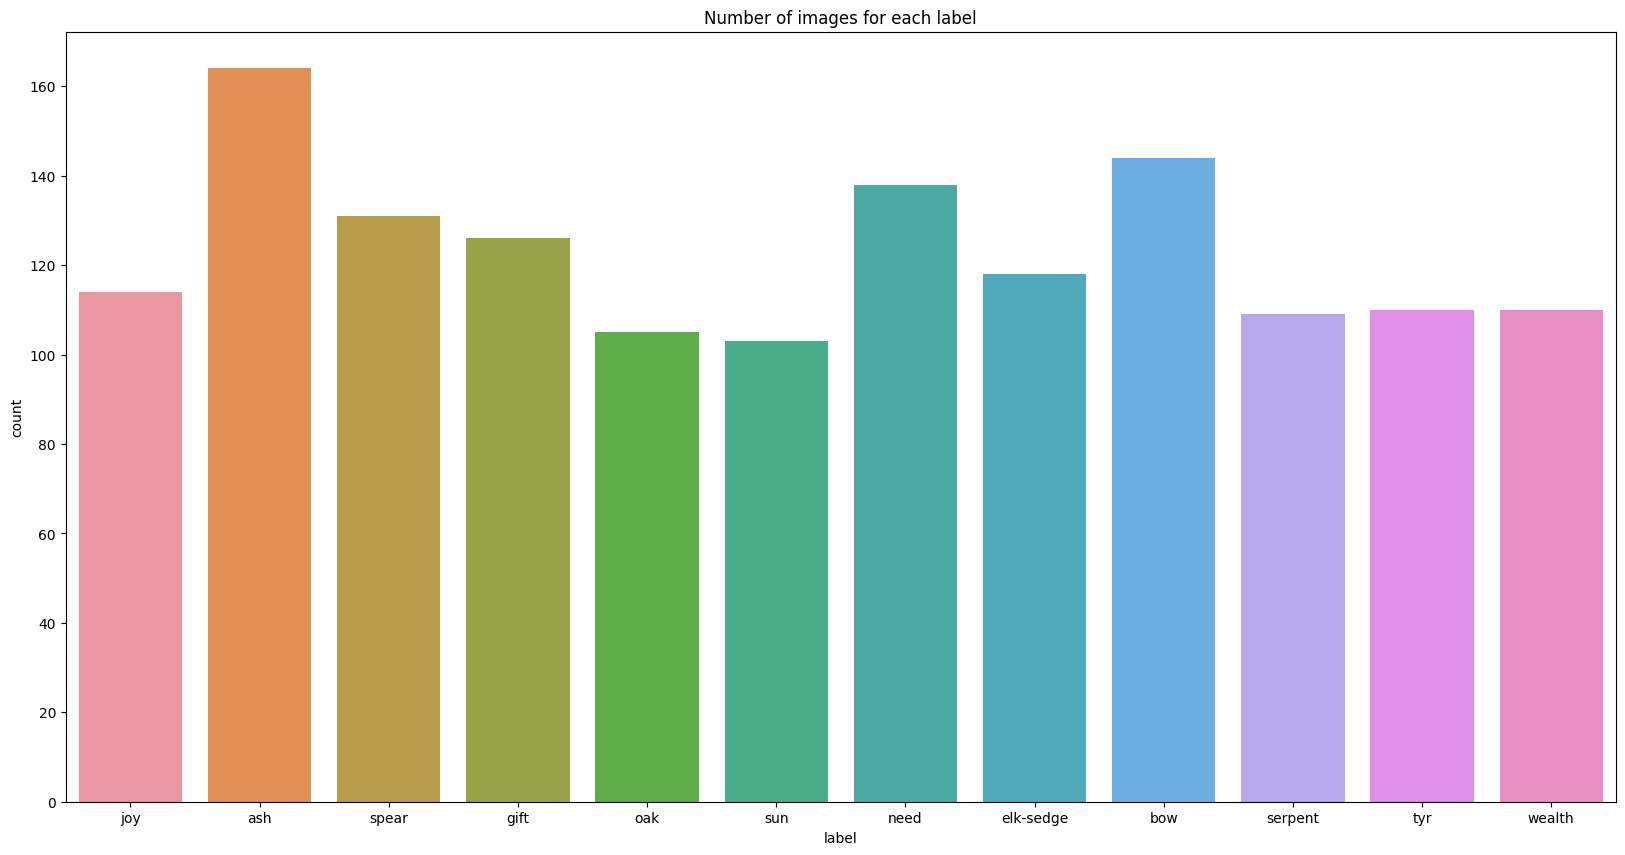

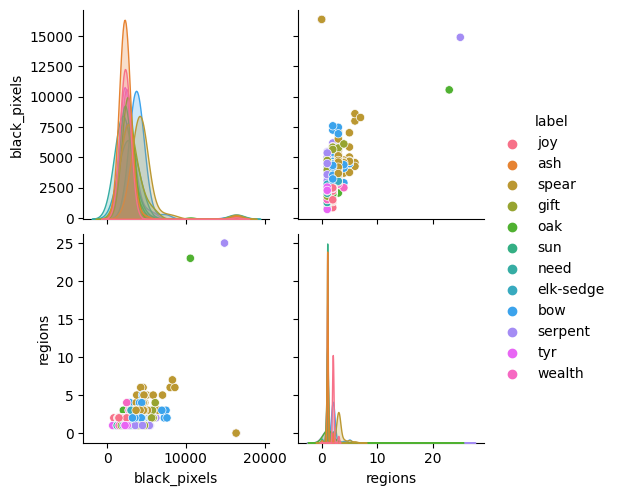

In [5]:
fig, ax = plt.subplots(nrows=len(images_dict.keys()), ncols=2, figsize=(20, 20)) # 2 for regions and pixels
fig.suptitle('Runes data distribution')

for i, (label, image_set) in enumerate(images_dict.items()):
    ax[i][0].set_title(f'{label}: black pixels (boxplot)')
    ax[i][1].set_title(f'{label}: num of regions (histogram)')
    sns.boxplot(data=image_set, ax=ax[i][0], x='black_pixels')
    sns.histplot(data=image_set, ax=ax[i][1], x='regions')

fig.subplots_adjust(hspace=2, top=0.94, bottom=0.1)

# Display how many images we have for each labels in bar chart
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Number of images for each label')
ax.set_xlabel('Labels')
ax.set_ylabel('Number of images')
sns.countplot(data=dataset, x='label', ax=ax)

sns.pairplot(dataset, hue="label")

### 6. Save the data

Since we only work with 2 features, we select both of them and save them for the next steps

In [6]:
directory = "../dataset-numpy/" 
path = os.path.join(directory, '2.0 - features.csv')

dataset.to_csv(path, index=False)